---

# Georgios_Ioannou


## Copyright © 2023 by Georgios Ioannou


---

<h1 align="center"> Text Emotion System Sentiment Analysis </h1>
<h2 align="center"> TESSA </h2>

In this notebook, we will be classifying emotion based on text documents. The dataset we will be using is called:

<p style="text-align: center;"><a href="https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp">Emotions Dataset for NLP</a></p>


---

<h2 align="center"> Remember our main steps motto "ISBE" </h2>

<h3 align="center"> Main Steps when building a Machine Learning Model </h3>

1. **I** - `Inspect and explore data`
2. **S** - `Select and engineer features`
3. **B** - `Build and train model`
4. **E** - `Evaluate model`


---

<h2 align='center'> GPU Information </h2>


In [1]:
!nvidia-smi


Wed Dec 20 08:15:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

---

<h2 align='center'> Libraries </h2>


In [2]:
# Import libraries.

# Use inline so our visualizations display in notebook.


%matplotlib inline


import matplotlib.pyplot as plt   # Data visualization.
import nltk                       # Natural Language Processing.
import numpy as np                # Data wrangling.
import os                         # Manipulate operating system interfaces.
import pandas as pd               # Data handling.
pd.set_option('display.max_colwidth', None)
import pickle                     # Python object serialization.
import plotly.express as px       # Data visualization
import plotly.graph_objects as go # Data visualization
import re                         # Regular expression operations.
import seaborn as sns             # Data visualization.
import subprocess                 # To download nltk wordnet in Kaggle.
sns.set()
import warnings                   # Ignore all warnings.
warnings.filterwarnings('ignore')


from nltk.stem import WordNetLemmatizer # Lemmatize using WordNet's built-in morphy function.
from nltk.stem import PorterStemmer     # Remove morphological affixes from words, leaving only the word stem.
from nltk.corpus import stopwords       # Remove stopwaords.
from nltk import word_tokenize          # Tokenize.
from sklearn.feature_extraction.text import CountVectorizer # Convert a collection of text documents to a matrix of token counts.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, multilabel_confusion_matrix, precision_score, recall_score # Evaluation metrics.
from sklearn.model_selection import train_test_split     # Eplit data in training/validating/testing.
from sklearn.naive_bayes import MultinomialNB            # Multinomial Naive Bayes classifier.
from sklearn.preprocessing import LabelEncoder           # Encode target labels with value between 0 and n_classes-1.
from tensorflow.keras.callbacks import EarlyStopping     # Stop training when a monitored metric has stopped improving.
from tensorflow.keras.callbacks import ReduceLROnPlateau # Reduce learning rate when a metric has stopped improving.
from tensorflow.keras.layers import Activation, BatchNormalization, Bidirectional, Concatenate, Conv1D, Dense, Dropout, Embedding, GlobalMaxPooling1D, LSTM, MaxPooling1D, ReLU # Keras layers API.
from tensorflow.keras.models import Model, Sequential # Model achitecture.
from tensorflow.keras.optimizers import Adam         # Adam optimizer.
from tensorflow.keras.preprocessing.sequence import pad_sequences # Transformsa list of sequences into a 2D Numpy array.
from tensorflow.keras.preprocessing.text import Tokenizer         # Vectorize a text corpus.
from tensorflow.keras.utils import plot_model                     # Visualize the model and save it.
from tensorflow.keras.utils import to_categorical                 # Converts a class vector (integers) to binary class matrix.


try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = 'unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora'
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')
    

from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

True

---

## #3 Build And Train CNN Model


In [78]:
# CNN Model Hyperparameters.

# Embedding.

input_dim = vocabulary_size
output_dim = 200

# Convolution.

kernel_size = 5
filters = 64
kernel_size = 3

In [79]:
# Create the neural network.

model1 = Sequential()

# X_train.shape[1] = 256
model1.add(Embedding(input_dim, output_dim, input_length=X_train.shape[1]))

model1.add(Conv1D(filters, kernel_size, padding="same", activation="relu"))

model1.add(BatchNormalization())

model1.add(ReLU())

model1.add(Dropout(0.5))

model1.add(GlobalMaxPooling1D())

model2 = Sequential()

model2.add(Embedding(input_dim, output_dim, input_length=X_train.shape[1]))

model2.add(Conv1D(filters, kernel_size, padding="same", activation="relu"))

model2.add(BatchNormalization())

model2.add(ReLU())

model2.add(Dropout(0.5))

model2.add(GlobalMaxPooling1D())


concatenated = Concatenate()([model1.output, model2.output])

hid_layer = Dense(128, activation="relu")(concatenated)

dropout = Dropout(0.5)(hid_layer)

output_layer = Dense(6, activation="softmax")(dropout)

model = Model(inputs=[model1.input, model2.input], outputs=output_layer)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 embedding_2_input (InputLa  [(None, 256)]                0         []                            
 yer)                                                                                             
                                                                                                  
 embedding_3_input (InputLa  [(None, 256)]                0         []                            
 yer)                                                                                             
                                                                                                  
 embedding_2 (Embedding)     (None, 256, 200)             2865200   ['embedding_2_input[0][0]']   
                                                                                              

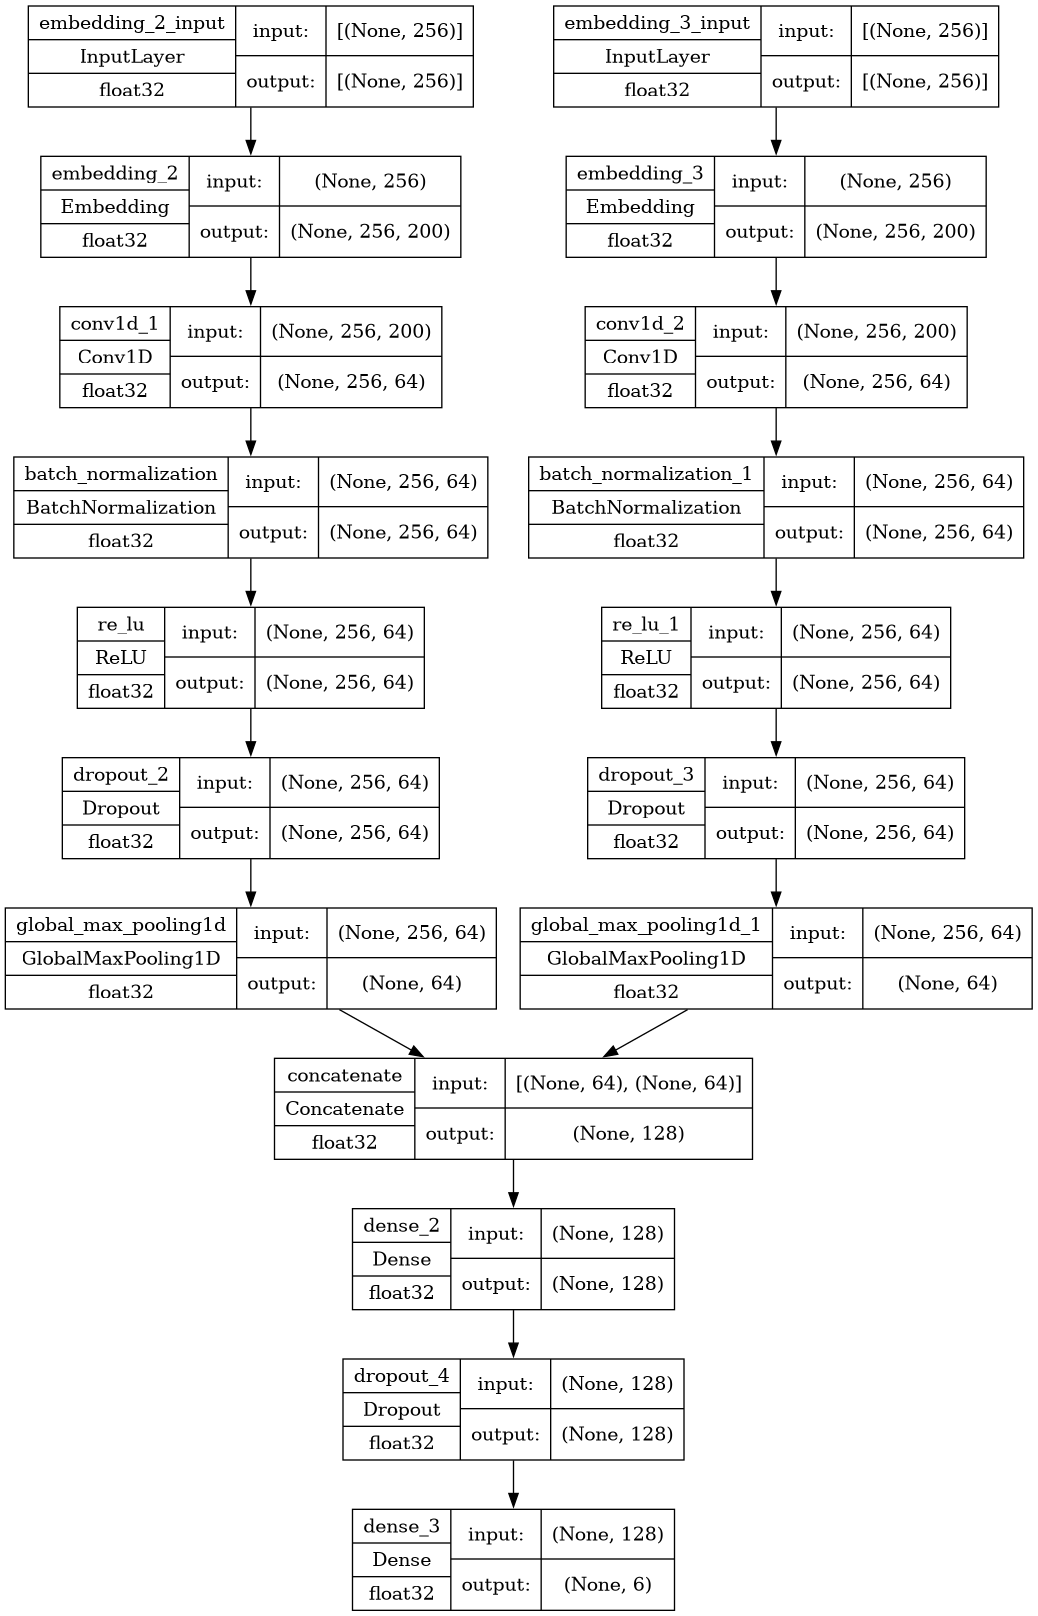

In [80]:
plot_model(model, to_file="tessa_cnn_model.png", show_shapes=True, show_dtype=True)

In [81]:
# Compile the model.

model.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=["accuracy"])

In [82]:
# Fit the model.

history_callback_object = model.fit(
    x=[X_train, X_train],
    y=y_train,
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping, reduce_learning_rate],
    validation_data=([X_valid, X_valid], y_valid),
)

Epoch 1/100
125/125 [==============================] - 34s 246ms/step - loss: 1.8218 - accuracy: 0.3157 - val_loss: 1.7550 - val_accuracy: 0.3489 - lr: 0.0010
Epoch 2/100
125/125 [==============================] - 12s 100ms/step - loss: 1.4742 - accuracy: 0.4173 - val_loss: 1.7166 - val_accuracy: 0.4491 - lr: 0.0010
Epoch 3/100
125/125 [==============================] - 10s 79ms/step - loss: 1.1949 - accuracy: 0.5494 - val_loss: 1.5526 - val_accuracy: 0.7228 - lr: 0.0010
Epoch 4/100
125/125 [==============================] - 5s 38ms/step - loss: 0.8035 - accuracy: 0.7090 - val_loss: 1.0935 - val_accuracy: 0.8426 - lr: 0.0010
Epoch 5/100
125/125 [==============================] - 6s 43ms/step - loss: 0.5121 - accuracy: 0.8186 - val_loss: 0.5975 - val_accuracy: 0.8837 - lr: 0.0010
Epoch 6/100
125/125 [==============================] - 5s 40ms/step - loss: 0.3512 - accuracy: 0.8810 - val_loss: 0.3515 - val_accuracy: 0.9038 - lr: 0.0010
Epoch 7/100
125/125 [==============================] 

In [83]:
# Loss graph.

fig = px.line(
    data_frame=history_callback_object.history,
    y=["loss", "val_loss"],
    labels={"index": "Epoch", "value": "Loss"},
    title="Loss vs Epoch",
)
fig.show()

history_callback_object.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [84]:
# Accuracy graph.

fig = px.line(
    data_frame=history_callback_object.history,
    y=["accuracy", "val_accuracy"],
    labels={"index": "Epoch", "value": "Accuracy"},
    title="Accuracy vs Epoch",
)
fig.show()

history_callback_object.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

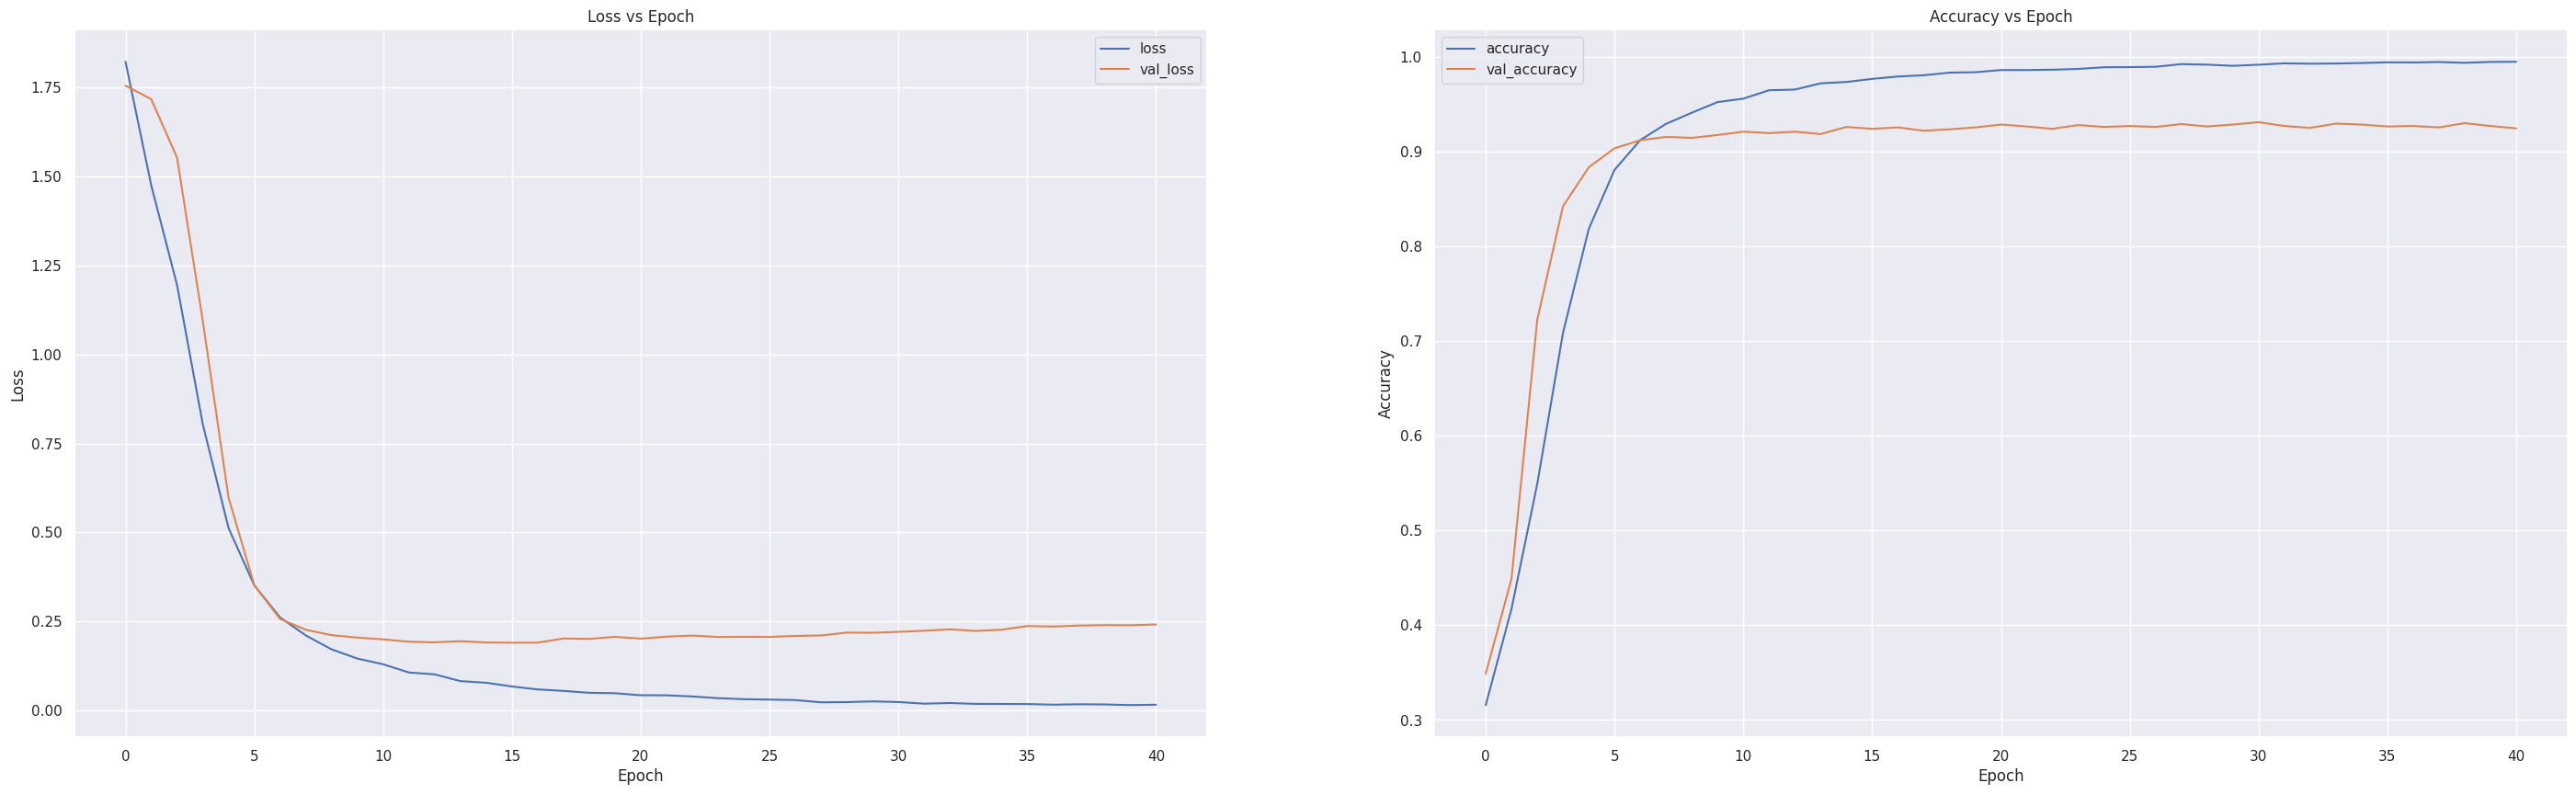

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [85]:
# Both loss and accuracy graphs side to side.

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(history_callback_object.history["loss"], label="loss")
ax1.plot(history_callback_object.history["val_loss"], label="val_loss")
ax1.legend()
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Loss vs Epoch")
ax1.grid(True)

ax2.plot(history_callback_object.history["accuracy"], label="accuracy")
ax2.plot(history_callback_object.history["val_accuracy"], label="val_accuracy")
ax2.legend()
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy vs Epoch")
ax2.grid(True)

fig.set_figheight(10)
fig.set_figwidth(35)
plt.show()

history_callback_object.history.keys()